# Nairobi House Price Prediction – Day 3  
**Exploratory Data Analysis + Baseline Model**

**Goal:**
- Answer the 3 required questions
- Build & evaluate Linear Regression baseline
- Train/test split
- Metrics: MAE, RMSE, R²
- Interpret MAE in KES

**Deliverables:**
- Modeling notebook
- Baseline performance summary

In [ ]:
# Importing libraries
import pandas as pd #for data handling
import numpy as np # for numeric calculations
import matplotlib.pyplot as plt #for plots
import seaborn as sns #plots revamped
# Scikit-learn - for machine learning
from sklearn.model_selection import train_test_split #split data
from sklearn.linear_model import LinearRegression #the model
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score #evaluation
from sklearn.preprocessing import OneHotEncoder #turning categories to numbers
from sklearn.compose import ColumnTransformer #handle different column types
from sklearn.pipeline  import Pipeline #clean pipeline


In [4]:
# Loading the cleaned dataset we prepared in the ../data/processed folder
df  = pd.read_csv("../data/processed/clean_listings.csv")

# Qiuck examination ensure it loaded correctly
print("Dataset loaded!")
print("Number of rows",df.shape[0])
print("Number of Columns",df.shape[1])
print("\nCoulmns in the dataset:")
print(df.columns.to_list())

print("\nPreview of First 5 rows:")
display(df.head(5))

print("\nMissing values per column:")
print(df.isna().sum())


Dataset loaded!
Number of rows 397
Number of Columns 10

Coulmns in the dataset:
['Location', 'Property Type', 'Bedrooms', 'Bathrooms', 'Size', 'Price', 'Source_URL', 'Size_m2', 'price_per_sqft', 'month']

Preview of First 5 rows:


,Location,Property Type,Bedrooms,Bathrooms,Size,Price,Source_URL,Size_m2,price_per_sqft,month
0,"Thigiri, Westlands",house,6,6.0,NaN,260000000.0,https://www.buyrentkenya.com/houses-for-sale/n...,64.0,4062500.0,2
1,Kiambu Road,house,4,5.0,NaN,78000000.0,https://www.buyrentkenya.com/houses-for-sale/n...,64.0,1218750.0,2
2,Lavington,townhouse,6,7.0,NaN,160000000.0,https://www.buyrentkenya.com/houses-for-sale/n...,64.0,2500000.0,2
3,Lavington,villa,5,5.0,NaN,60000000.0,https://www.buyrentkenya.com/houses-for-sale/n...,64.0,937500.0,2
4,Lavington,villa,5,6.0,NaN,60000000.0,https://www.buyrentkenya.com/houses-for-sale/n...,64.0,937500.0,2



Missing values per column:
Location            0
Property Type       0
Bedrooms            0
Bathrooms           0
Size              326
Price               0
Source_URL          0
Size_m2             0
price_per_sqft      0
month               0
dtype: int64



Top 10 most expensive locations median price in KES:
Location
Muthaiga              240000000.0
Thigiri, Westlands    200000000.0
Gigiri, Westlands     167500000.0
Karen                 135000000.0
Runda                 130000000.0
Nyari                 130000000.0
Kitisuru              125000000.0
Rosslyn               113000000.0
Lower Kabete          110000000.0
Kyuna                 105000000.0
Name: Price, dtype: float64


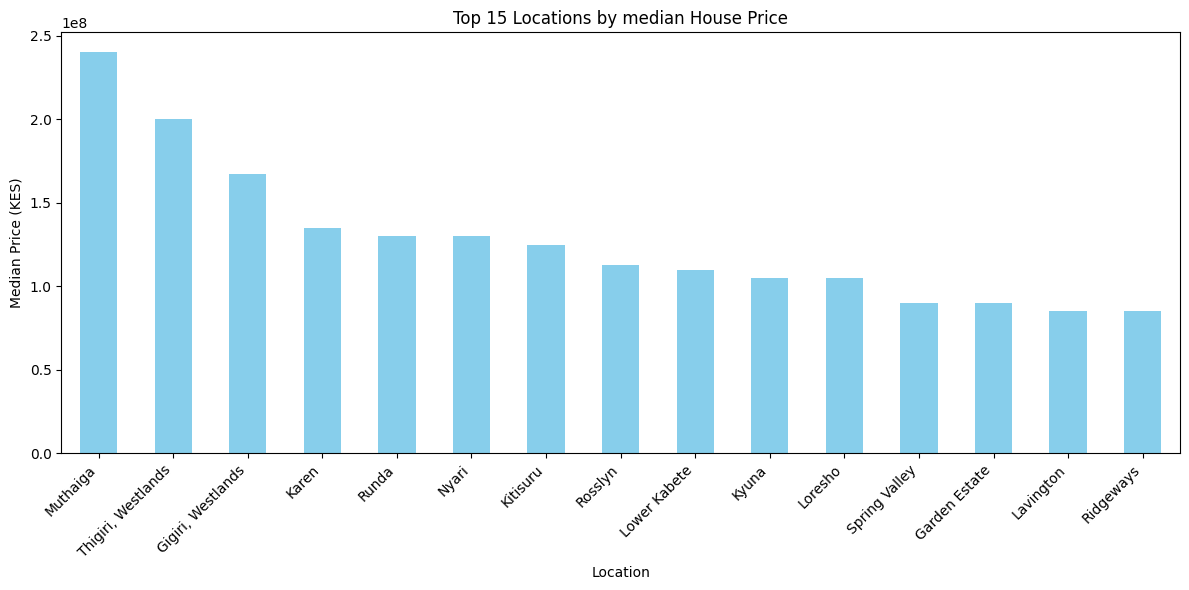

In [13]:
# EDA Question 1 -Most Expensive locations
# I'll use median price, which is better of than mean when the price have outliers

# Grouping by location and calculating the median price
location_median = df.groupby('Location')['Price'].median().sort_values(ascending=False) 

# Show the top 10 most expensive locations
print("\nTop 10 most expensive locations median price in KES:")
print(location_median.head(10))

# Bar Chart for visual Explanation
plt.figure(figsize=(12,6))
location_median.head(15).plot(kind='bar',color='skyblue')
plt.title('Top 15 Locations by median House Price')
plt.xlabel('Location')
plt.ylabel('Median Price (KES)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../presentation/day3_median_price_by_location.png')
plt.show()